# Clusters en ojo


Author:  Luis Miguel Sanchez-Brea

History: init - 180406

Project: Foco

_

Después de la reunión del jueves 5 de abril de 2008 intento reconstruir el campo de los clusters. 
El sábado 7 estuve hablando con Infor salieron resultados interesantes.
Utilizaré los datos del paper que hemos hecho.

Tomo los datos de la Figura 1: 

clusters de radio = 25 nm, 75 nm y 150 nm

Índice del cluster = 1.55

Índice del medio dependiente de la concentración. En el paper es c=0.1
Indice de refracción de proteina: 1.62
Índice de refracción del agua: 1.33


**concentración: **

$c = \frac{n - n_{water}}{n_{protein} - n_{water}}$

**Índice: **

$n = n_{water} + c  (n_{protein} - n_{water})$

*Nota*

Verificar si el campo incidente está o no 

![title](foco3.png)



## Definiciones

In [1]:
from __future__ import print_function, division

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

%config InlineBackend.figure_format = 'png'

from pprint import  pprint

In [4]:
from diffractio import sp, plt, mm, um, nm, degrees

from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.utils_math import ndgrid

from diffractio.scalar_masks_XZ import Scalar_mask_XZ

import matplotlib.cm as cm

In [5]:
n_water=1.33
n_protein=1.62

def n_medium(c):
    """índice de refracción en función de la concentración"""
    return n_water + c * (n_protein-n_water)

In [42]:
def field_vesicula(radius, c, wavelength=550*nm, has_incident_field = False, num_points=1024):
    """campo generado por la vesícula en función de la concentración
    
    Args:
        radius (float): radio de la vesícula
        c (float): [0,1] concentración
        has_incident_field (bool): Quitar campo inicial
        wavelength (float): wavelength
     """

    n_externo=n_medium(c)
    n_interno=1.55

    x_lim=radius+1*um

    x0 = sp.linspace(-5*um, 5*um , num_points)
    z0 = sp.linspace(-radius, 10*radius, num_points) #26 mm

    X, Z = ndgrid(x0, z0)

    u0 = Scalar_source_X(x0, wavelength)
    u0.plane_wave(A=1, theta=0 * degrees)

    vesicula = Scalar_mask_XZ(x=x0,z=z0,wavelength=wavelength,n_background=n_externo)
    vesicula.incident_field(u0)

    if has_incident_field is False:
        vesicula.BPM(verbose=False)
        campo_vacio=vesicula.u
        vesicula.u=sp.zeros_like(vesicula.u,dtype=complex)

    vesicula.sphere(r0=(0*um,radius), radius=(radius,radius), angle=0,
                    refraction_index= n_interno )
    
    #propagación
    vesicula.BPM(verbose=False)

    # para 1024x1024 son 297 ms por loop
    # para 2048x2048 son 969 ms por loop
    
    if has_incident_field is False:
        # elimino el campo inicial
        vesicula.u=vesicula.u-campo_vacio
    
    return vesicula

## Campo cercano

In [43]:
cluster1=field_vesicula(radius=25*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = True, num_points=1024*4)
cluster2=field_vesicula(radius=75*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = True, num_points=1024*4)
cluster3=field_vesicula(radius=150*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = True, num_points=1024*4)

-# executable

vesicula0_1.draw_refraction_index(colorbar_kind='horizontal', draw_borders=False, scale='scaled')

vesicula0_5.draw_refraction_index(colorbar_kind='horizontal', draw_borders=False, scale='scaled')

In [44]:
x_lim=cluster1.x[-1]

### Dibujar amplitudes

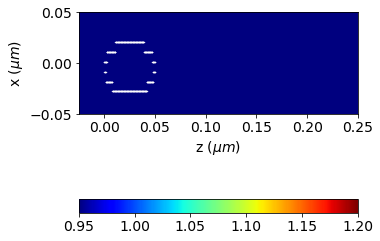

In [45]:
# esto es amplitude(u)
cluster1.draw(kind='amplitude', logarithm=False,  draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)

plt.ylim(-50*nm, 50*nm)
plt.clim(0.95,1.2)

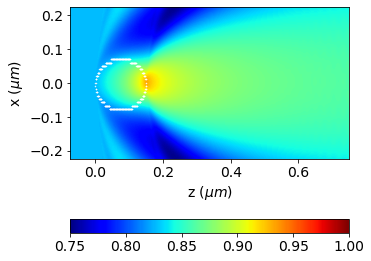

In [46]:
# esto es amplitude(u)
cluster2.draw(kind='amplitude', logarithm=False,  draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)

plt.ylim(-75*nm*3, 75*nm*3)
plt.clim(0.75,1.0)

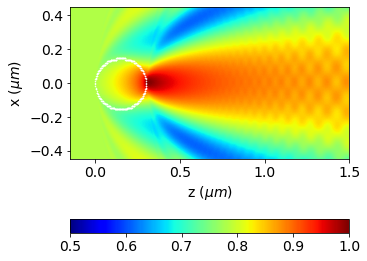

In [47]:
# esto es amplitude(u)
cluster3.draw(kind='amplitude', logarithm=False,  draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)

plt.ylim(-150*nm*3, 150*nm*3)
plt.clim(0.5,1.0)

### Dibujar Parte real

In [48]:
cluster1=field_vesicula(radius=25*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = False, num_points=1024*2)
cluster2=field_vesicula(radius=75*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = False, num_points=1024*2)
cluster3=field_vesicula(radius=150*nm, c=0.1, wavelength=550*nm, 
                           has_incident_field = False, num_points=1024*2)

(-0.125, 0.125)

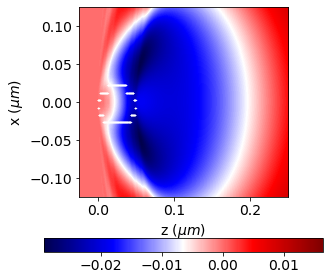

In [60]:
# esto es real(u)
cluster1.draw(kind='real', logarithm=False,  draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.seismic)

plt.ylim(-25*nm*5, 25*nm*5)

(-0.375, 0.375)

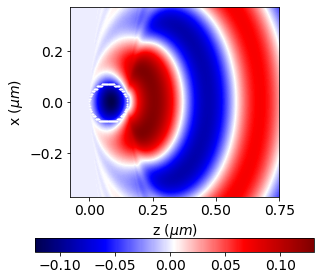

In [58]:
cluster2.draw(kind='real', logarithm=False, draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.seismic)

plt.ylim(-75*nm*5, 75*nm*5)

(-0.44999999999999996, 0.44999999999999996)

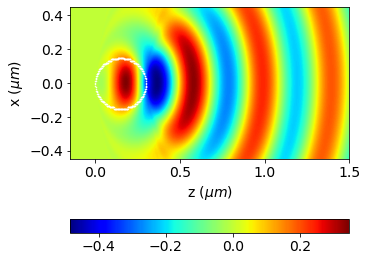

In [51]:
cluster3.draw(kind='real', logarithm=False, draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)
plt.ylim(-150*nm*3, 150*nm*3)

(-0.75, 0.75)

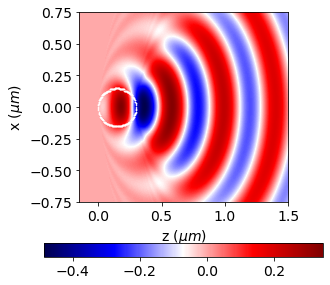

In [61]:
cluster3.draw(kind='real', logarithm=False, draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.seismic)
plt.ylim(-150*nm*5, 150*nm*5)

## Campo lejano

In [53]:
def lejano(cluster):
    ultimo=cluster.final_field()
    ultimo.fft(remove0=False,shift=True,matrix=False,new_field=False)
    ultimo.draw(kind='fft')
    plt.xlim(-180,180)

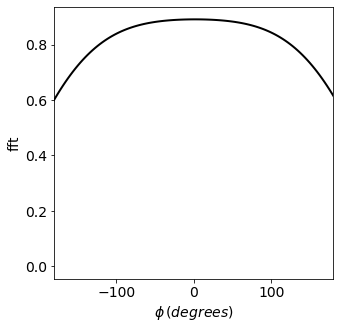

In [54]:
lejano(cluster1)

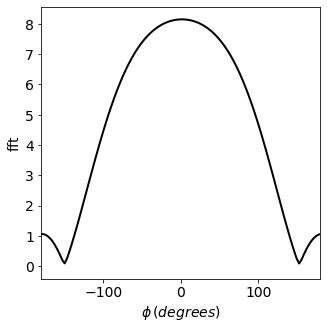

In [55]:
lejano(cluster2)

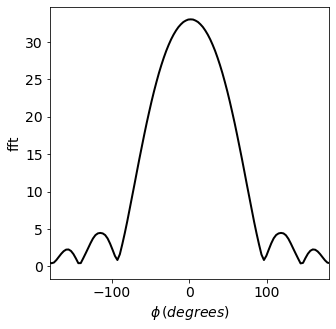

In [56]:
lejano(cluster3)